<a href="https://www.kaggle.com/code/monicaghuge/supermarket-sales-minproj?scriptVersionId=153313379" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales-csv/supermarket_sales - Sheet1.csv


In [2]:
import pandas as pd
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('/kaggle/input/supermarket-sales-csv/supermarket_sales - Sheet1.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df=df.drop(columns=['Invoice ID','Product line','City','cogs','Date','Branch','Payment','Time',
                    'Gender'])

In [6]:
df.head()

,Customer type,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
0,Member,74.69,7,26.1415,548.9715,4.761905,26.1415,9.1
1,Normal,15.28,5,3.8200,80.2200,4.761905,3.8200,9.6
2,Normal,46.33,7,16.2155,340.5255,4.761905,16.2155,7.4
3,Member,58.22,8,23.2880,489.0480,4.761905,23.2880,8.4
4,Normal,86.31,7,30.2085,634.3785,4.761905,30.2085,5.3


In [7]:
df.tail()

,Customer type,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
995,Normal,40.35,1,2.0175,42.3675,4.761905,2.0175,6.2
996,Normal,97.38,10,48.6900,1022.4900,4.761905,48.6900,4.4
997,Member,31.84,1,1.5920,33.4320,4.761905,1.5920,7.7
998,Normal,65.82,1,3.2910,69.1110,4.761905,3.2910,4.1
999,Member,88.34,7,30.9190,649.2990,4.761905,30.9190,6.6


In [8]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer type            1000 non-null   object 
 1   Unit price               1000 non-null   float64
 2   Quantity                 1000 non-null   int64  
 3   Tax 5%                   1000 non-null   float64
 4   Total                    1000 non-null   float64
 5   gross margin percentage  1000 non-null   float64
 6   gross income             1000 non-null   float64
 7   Rating                   1000 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 62.6+ KB


In [9]:
# checking the shape of data set
df.shape
# there are total 1000 rows and 17 columns

(1000, 8)

In [10]:
# check the datatypes of given dataset
df.dtypes

Customer type               object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [11]:
# describing the dataset which includes the mean median and standard deviation 
# and also includes min max values
df.describe()

,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,4.761905,49.650000,10.00000


In [12]:
# check is there is any null value  or not present in dataset
df.isnull().sum()

Customer type              0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
# There is no missing values

In [14]:
# Covariance And Correlation
print('Covariance')
display(df.cov(numeric_only=True))
print('n\Correlation')
display(df.corr(numeric_only=True))

Covariance


,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
Unit price,701.965331,0.834778,196.668340,4130.035142,0.0,196.668340,-0.399668
Quantity,0.834778,8.546446,24.149570,507.140978,0.0,24.149570,-0.079456
Tax 5%,196.668340,24.149570,137.096594,2879.028477,0.0,137.096594,-0.733300
Total,4130.035142,507.140978,2879.028477,60459.598018,0.0,2879.028477,-15.399306
gross margin percentage,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
gross income,196.668340,24.149570,137.096594,2879.028477,0.0,137.096594,-0.733300
Rating,-0.399668,-0.079456,-0.733300,-15.399306,0.0,-0.733300,2.953518


n\Correlation


,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [15]:
# How many branches there are in dataset
df['Unit price'].value_counts()

Unit price
83.77    3
39.62    2
24.74    2
19.15    2
73.47    2
        ..
57.95    1
47.65    1
42.82    1
48.09    1
88.34    1
Name: count, Length: 943, dtype: int64

In [16]:
# sorting the values of  with sales in descending otder
df.sort_values(by=['Total','gross income'],ascending=False)[0:5]

,Customer type,Unit price,Quantity,Tax 5%,Total,gross margin percentage,gross income,Rating
350,Member,99.30,10,49.65,1042.65,4.761905,49.65,6.6
167,Normal,98.98,10,49.49,1039.29,4.761905,49.49,8.7
557,Member,98.52,10,49.26,1034.46,4.761905,49.26,4.5
699,Normal,97.50,10,48.75,1023.75,4.761905,48.75,8.0
996,Normal,97.38,10,48.69,1022.49,4.761905,48.69,4.4


In [17]:
# For finding unique values of City,Product line and Total,
print(df[["gross income"]].nunique())

gross income    990
dtype: int64


In [18]:
#  Specifying Aggregation For Columns Using Dictionaries

df.agg({"Total":["mean","std"],"gross income":["mean","std"]})

,Total,gross income
mean,322.966749,15.379369
std,245.885335,11.708825


In [19]:
# There is Total is the Target value (Dependent varible) and
#(X is the independent variable)

X= df[['gross income','Quantity','Total','Rating']]
y = df['Unit price'] # target value(y variable)
print('shape of X',X.shape)
print('shape of y',y.shape)

shape of X (1000, 4)
shape of y (1000,)


In [20]:
X.head()

,gross income,Quantity,Total,Rating
0,26.1415,7,548.9715,9.1
1,3.8200,5,80.2200,9.6
2,16.2155,7,340.5255,7.4
3,23.2880,8,489.0480,8.4
4,30.2085,7,634.3785,5.3


In [21]:
y.head()

0    74.69
1    15.28
2    46.33
3    58.22
4    86.31
Name: Unit price, dtype: float64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
print('shape of X',X_train.shape)
print('shape of y',y_train.shape)
print('shape of X',X_test.shape)
print('shape of y',y_test.shape)

shape of X (800, 4)
shape of y (800,)
shape of X (200, 4)
shape of y (200,)


In [23]:
X_train.head()

,gross income,Quantity,Total,Rating
108,15.291,9,321.111,4.2
134,24.390,6,512.190,5.3
585,10.342,4,217.182,9.8
42,20.736,6,435.456,5.6
990,14.140,5,296.940,4.5


In [24]:
y_train.head()

108    33.98
134    81.30
585    51.71
42     69.12
990    56.56
Name: Unit price, dtype: float64

In [25]:
X_test.head()

,gross income,Quantity,Total,Rating
492,10.1280,8,212.6880,8.7
383,14.9780,4,314.5380,4.2
856,8.4480,8,177.4080,6.3
834,14.2555,7,299.3655,5.4
603,16.3530,6,343.4130,7.8


In [26]:
y_test.head()

492    25.32
383    74.89
856    21.12
834    40.73
603    54.51
Name: Unit price, dtype: float64

In [27]:
y_test.head()

492    25.32
383    74.89
856    21.12
834    40.73
603    54.51
Name: Unit price, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=lr.predict(X_test)

In [30]:
y_test.head()

492    25.32
383    74.89
856    21.12
834    40.73
603    54.51
Name: Unit price, dtype: float64

In [31]:
y_pred[0:5]

array([21.3372942 , 65.50667426, 15.89172416, 40.13333174, 54.64880273])

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error ,mean_squared_error , r2_score

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a scikit-learn pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
      ('linear_regression',LinearRegression())     
   ])


# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [34]:
# Adding Cross-Validation

# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error ,mean_squared_error , r2_score



# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a scikit-learn pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
         ('linear_regression',LinearRegression())
    # Step 1: Feature Scaling
    # Step 2: Model Training (Logistic Regression)
])

# Perform cross-validation on the training data
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=4)

# Perform cross-validation
rf_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
rf_mse = -rf_scores.mean()

print("Random Forest Mean Squared Error:", rf_mse)

lasso_regressor = Lasso(alpha=1.0, random_state=4)

# Perform cross-validation
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_mse = -lasso_scores.mean()

print("Lasso Mean Squared Error:", lasso_mse)

ridge_regressor = Ridge(alpha=1.0, random_state=4)

# Perform cross-validation
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_mse = -ridge_scores.mean()

print("Ridge Mean Squared Error:", ridge_mse)

Cross-Validation Scores: [0.74752464 0.82676738 0.76257103 0.73658125 0.79045991]
Random Forest Mean Squared Error: 1.5045725442100024
Lasso Mean Squared Error: 154.39565035556058
Ridge Mean Squared Error: 154.0390225553385


In [35]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [36]:
# linear regression prediction
y_pred = pipeline.predict(X_test)
y_pred

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" linear regression mean square error: {mse}")
print(f" linear regression mean absolute error: {mae}")
print(f" linear regression R-squared: {r2}")



# create pipeline for random forest regression
pipeline_random =Pipeline([('scaler', StandardScaler()),
                     ('random_forest',RandomForestRegressor())])

 linear regression mean square error: 144.69807098569245
 linear regression mean absolute error: 8.734155822968567
 linear regression R-squared: 0.8059090315789021


In [37]:
# Displaying a Complex Pipeline Chaining a Column Transformer

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ["City", "Gender"]),
        ("numerical", numeric_preprocessor, ["Total", "Tax 5%"]),
    ]
)

pipe = make_pipeline(preprocessor, LinearRegression())
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Gender']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Total', 'Tax 5%'])])),
                ('linearregression', LinearRegression())])

In [38]:
# Displaying a Grid Search over a Pipeline with a Linear regression

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ['Invoice ID','Branch','City','Gender','Date','Time',
'Payment','cogs','Customer type']),
        ("numerical", numeric_preprocessor, ['Unit price','gross income','Tax 5%','Total','Rating',
'Qauntity','gross margin percentage']),
    ]
)

pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("'linear_regression'", RandomForestClassifier())]
)

param_grid = {
    "'linear_regression'__n_estimators": [200, 500],
    "'linear_regression'__max_features": ["auto", "sqrt", "log2"],
    "'linear_regression'__max_depth": [4, 5, 6, 7, 8],
    "'linear_regression'__criterion": ["gini", "entropy"],
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, n_jobs=1)
grid_search  # click on the diagram below to see the details of each step

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputation_constant',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Invoice '
                                                                          'ID',
                                                                          'Branch',
                                                                          'City',
                                                                          'Gender',
                                                                          'Date',
                                                                          'Time',
                                                                          'Payment',
                                                                          'cogs',
                                                                          'Customer '
                                                                          'type']),
                                                                        ('numerica...
                                                                          'income',
                                                                          'Tax '
                                                                          '5%',
                                                                          'Total',
                                                                          'Rating',
                                                                          'Qauntity',
                                                                          'gross '
                                                                          'margin '
                                                                          'percentage'])])),
                                       ("'linear_regression'",
                                        RandomForestClassifier())]),
             n_jobs=1,
             param_grid={"'linear_regression'__criterion": ['gini', 'entropy'],
                         "'linear_regression'__max_depth": [4, 5, 6, 7, 8],
                         "'linear_regression'__max_features": ['auto', 'sqrt',
                                                               'log2'],
                         "'linear_regression'__n_estimators": [200, 500]})

In [39]:
from sklearn.base import TransformerMixin, BaseEstimator

class Debug(BaseEstimator, TransformerMixin):

    def transform(self, X):
        print(X.shape)
        print(X)
        return X

    def fit(self, X, y=None, **fit_params):
        return self

Text(0.5, 1.0, 'Linear regression Model')

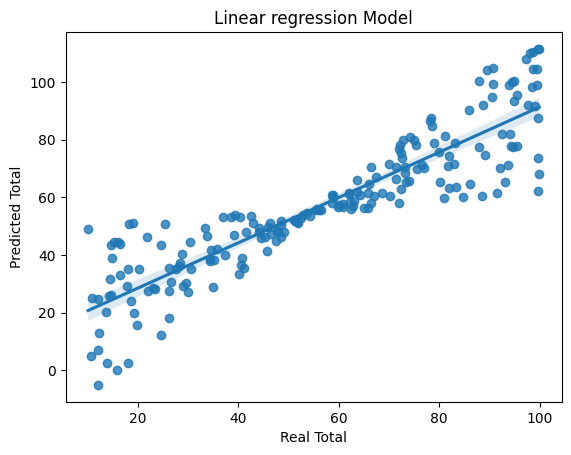

In [40]:
# ploting linear regression model
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Real Total")
plt.ylabel("Predicted Total")
plt.title("Linear regression Model")

Text(0.5, 1.0, 'Random Forest Regressor Model')

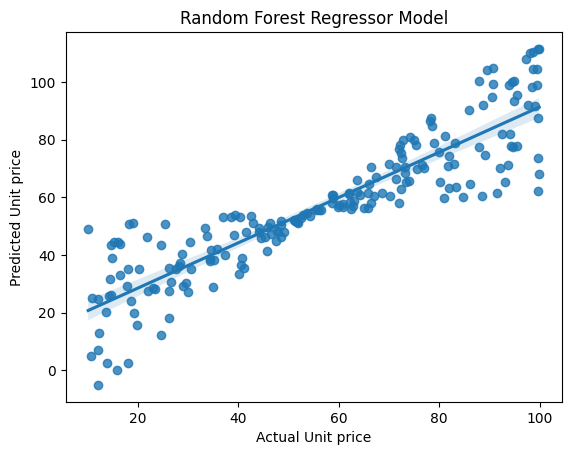

In [41]:
# ploting random forest model
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Unit price")
plt.ylabel("Predicted Unit price")
plt.title("Random Forest Regressor Model")

In [42]:
# The give dataset give the information about saling of supermarket.after doing all the function on
# this dataset like EDA , Data Visualization Support Vector Machine,Cross Validation etc
# All these are giving the best accuracy like SVM ((rbf,polynominal,linear)),Standarization Normilization


# these dataset also giving the accuracy of:
#linear regression mean square error: 
 #linear regression mean absolute error
 #linear regression R-squared:
#Cross-Validation Scores: 
#Random Forest Mean Squared Error: 
#Lasso Mean Squared Error: 
#Ridge Mean Squared Error: